**Project Summary:**

This project focuses on the analysis and clustering of a wine dataset using unsupervised learning techniques. The dataset contains chemical analysis results for wines grown in the same region of Italy, derived from three different cultivars. The goal is to apply K-Means clustering on the data, with dimensionality reduction using Principal Component Analysis (PCA) to better understand the structure and patterns within the data.

**Steps Taken:**
**Data Preprocessing:** The dataset was cleaned and scaled to prepare it for further analysis. Necessary preprocessing steps were applied to ensure that the data is ready for clustering.

**Exploratory Data Analysis:**

**Pairplot:** A pairplot was created to explore the relationships between various features of the dataset.
Heatmap: A heatmap was generated to visualize correlations between different features.
Dimensionality Reduction with PCA:

**PCA (Principal Component Analysis)** was applied to reduce the dataset’s dimensionality to 3 components.
A 2D PCA scatter plot was created to visualize the data in two principal components.
A 3D PCA scatter plot was also created to visualize the clusters in three dimensions.

**Clustering with K-Means:**
The dataset was clustered using the K-Means algorithm, with the number of clusters set to 3.
The results were visualized using scatter plots, both 2D and 3D, with clusters shown in different colors.

**Objective:**
The goal of the project was to explore how clustering can group wines based on their chemical properties and how PCA can help in visualizing these clusters in reduced dimensions.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv("wine_clustering.csv")
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Exploratory Data Analysis.

In [3]:
print(f'Missing values in dataset: {data.isna().sum().sum()}')
print(f'Duplicates in dataset: {data.duplicated().sum()}')
print(f'Data types: {data.dtypes.unique()}')

Missing values in dataset: 0
Duplicates in dataset: 0
Data types: [dtype('float64') dtype('int64')]


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


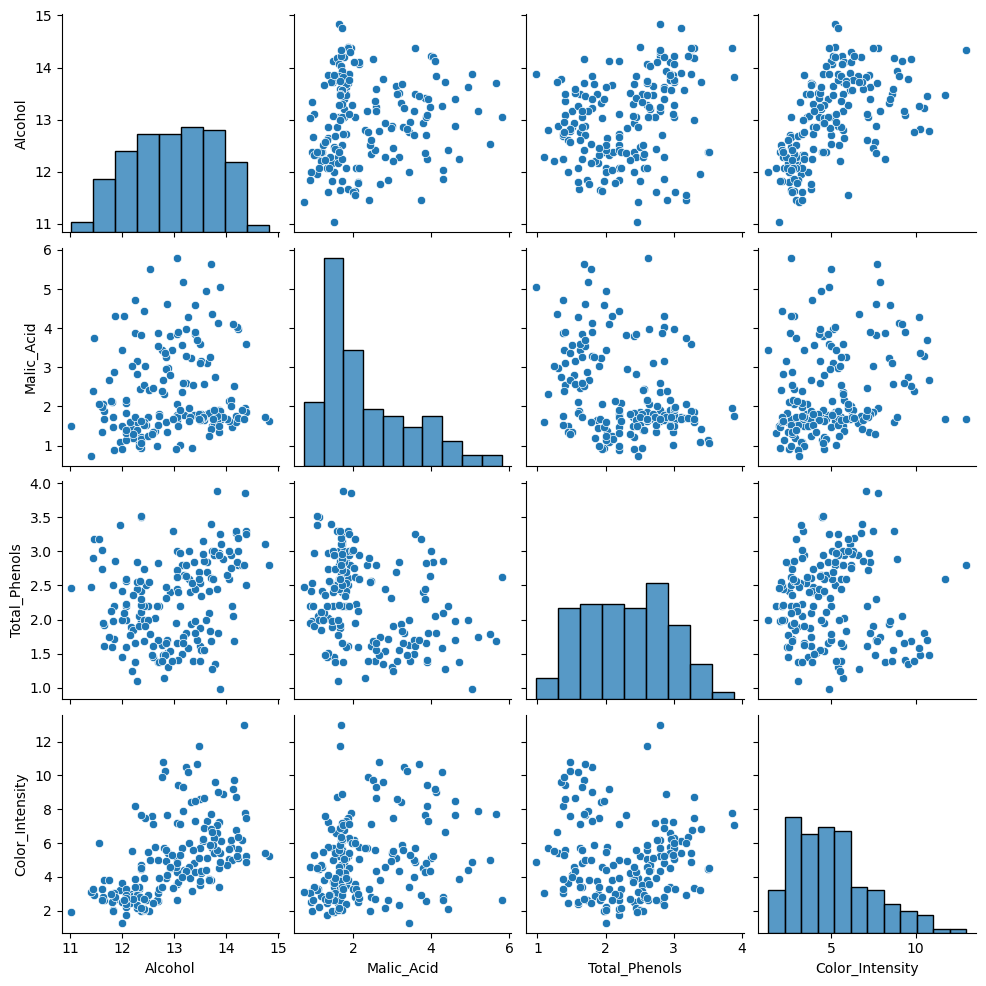

In [6]:
selected_columns = ['Alcohol', 'Malic_Acid', 'Total_Phenols', 'Color_Intensity']
sns.pairplot(data[selected_columns])
plt.show()


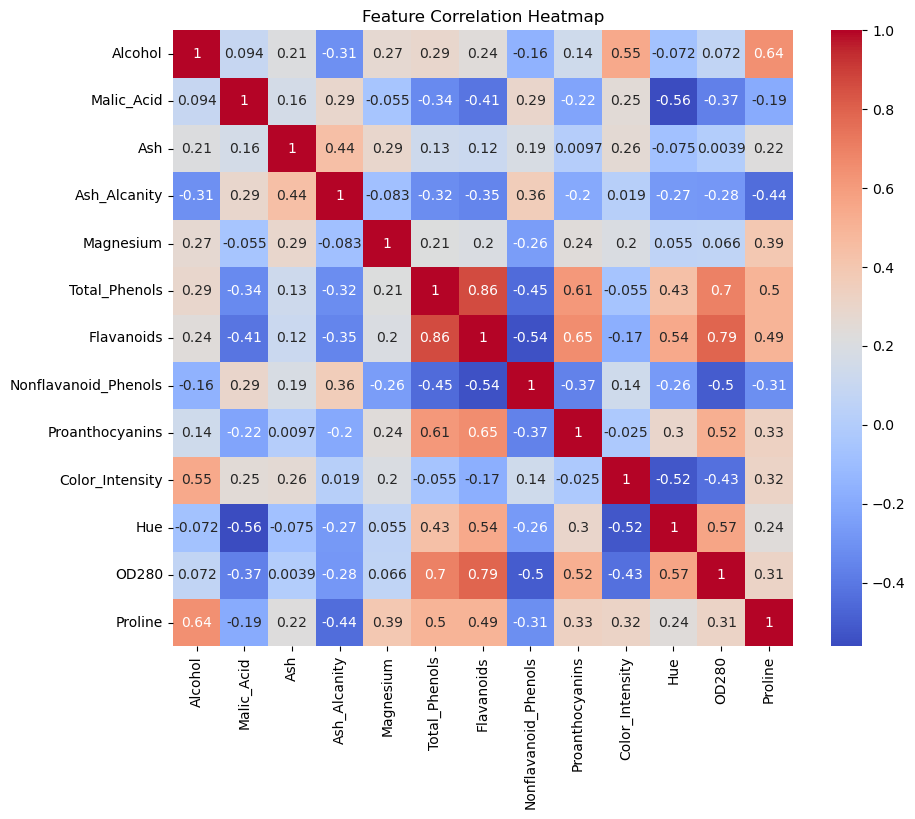

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()



### Normalization

In [8]:
scaler=StandardScaler()
scaled_data= scaler.fit_transform(data)

### PCA for Dimensionality Reduction

In [9]:
pca=PCA(n_components=3)
pca_data=pca.fit_transform(scaled_data)
pca_data

array([[ 3.31675081e+00,  1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00, -3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00,  1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00,  2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00,  8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00,  2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00,  1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00,  1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00,  9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00,  7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00,  1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00,  6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00,  6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00,  1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00,  2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00,  1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00,  2.32730534e+00

In [10]:
data['PC1'] = pca_data[:, 0]
data['PC2'] = pca_data[:, 1]
data['PC3'] = pca_data[:, 2]  

### K-Means Clustering

In [11]:
kmeans=KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)
data

C:\Users\dawoo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,PC1,PC2,PC3,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3.316751,1.443463,-0.165739,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2.209465,-0.333393,-2.026457,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2.516740,1.031151,0.982819,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3.757066,2.756372,-0.176192,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1.008908,0.869831,2.026688,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,-3.370524,2.216289,-0.342570,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,-2.601956,1.757229,0.207581,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,-2.677839,2.760899,-0.940942,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,-2.387017,2.297347,-0.550696,1


### Visualization: PCA Scatter Plot with Clusters

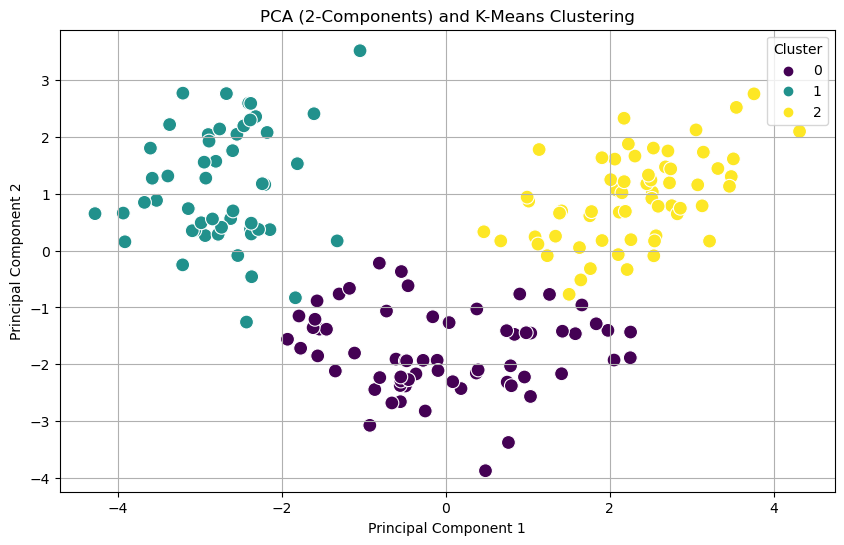

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.title('PCA (2-Components) and K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

### Visualization: PCA 3D Scatter Plot with Clusters

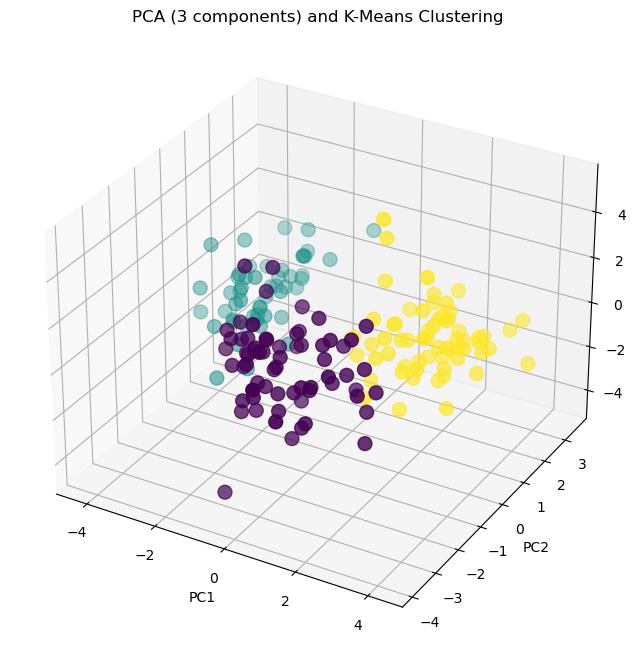

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the 3D scatter plot
ax.scatter(data['PC1'], data['PC2'], data['PC3'], c=data['Cluster'], cmap='viridis', s=100)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA (3 components) and K-Means Clustering')
plt.show()

### Pairplot

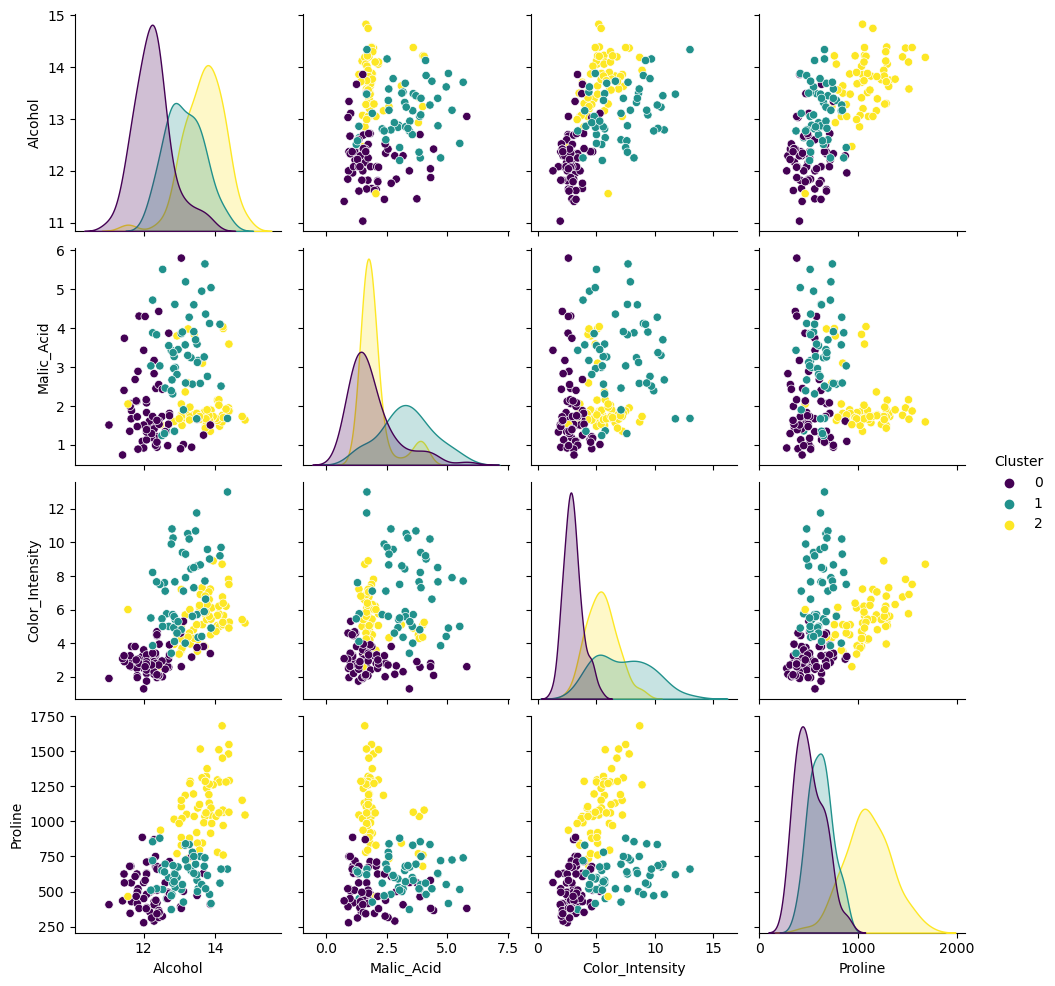

In [14]:
sns.pairplot(data, vars=['Alcohol', 'Malic_Acid', 'Color_Intensity', 'Proline'], hue='Cluster', palette='viridis')
plt.show()

### Cluster Analysis (Cluster Centers)

In [17]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (Original Scale):\n", cluster_centers)


Cluster Centers (Original Scale):
 [[1.22509231e+01 1.89738462e+00 2.23123077e+00 2.00630769e+01
  9.27384615e+01 2.24769231e+00 2.05000000e+00 3.57692308e-01
  1.62415385e+00 2.97307692e+00 1.06270769e+00 2.80338462e+00
  5.10169231e+02]
 [1.31341176e+01 3.30725490e+00 2.41764706e+00 2.12411765e+01
  9.86666667e+01 1.68392157e+00 8.18823529e-01 4.51960784e-01
  1.14588235e+00 7.23470586e+00 6.91960784e-01 1.69666667e+00
  6.19058824e+02]
 [1.36767742e+01 1.99790323e+00 2.46629032e+00 1.74629032e+01
  1.07967742e+02 2.84758065e+00 3.00322581e+00 2.92096774e-01
  1.92209677e+00 5.45354839e+00 1.06548387e+00 3.16338710e+00
  1.10022581e+03]]


This project analyzes a wine dataset using unsupervised learning by applying K-Means clustering to group wines based on chemical properties and using PCA for dimensionality reduction and visualization. Key steps include data preprocessing, exploratory data analysis (pairplot and heatmap), and creating 2D/3D scatter plots to interpret clusters..